*Joel Reyes Toledo*

Universidad de La Laguna. Grado en Física, curso 2022-23

Física Computacional.


# Práctica 2
## **Métodos de integración**

***Ejercicio 1***

*Implementar al menos dos métodos de integración vistos en clase de teoría y realizar un
análisis y discusión sobre la influencia del numero de intervalos a utilizar y el error cometido.*

Para este ejercicio se ha escogido utilizar los métodos de *cuadratura Gaussiana* y la *fórmula de Milne*, un subtipo de las fórmulas cerradas de Newton-Cotes.

En primer lugar se describe una función para llevar a cabo el método de cuadratura Gaussiana.

Gauss busca reducir el coste computacional, partiendo de escoger nodos no necesariamente equiespaciados. La forma que plantea inicialmente es:

$$ I_n(f) = \sum_{i=0}^n{\omega_i\cdot f(x_i)}$$

Donde los nodos $x_i$ son los puntos donde el polinomio de Legendre es nulo, y los pesos $omega_i$ son valores que usaremos tabulados pero que se obtienen a raíz de imponer las condiciones en función del número de nodos. Estas condiciones son en realidad forzar que la fórmula de cuadratura sea exacta para los polinomios del grado que se desee. En concreto, se usarán los siguientes valores de los nodos y sus pesos tabulados:

| Nº de nodos (n) | Nodos $x_i$ | Pesos $\omega_i$ |
| :-------: | :-------: | :-------: |
| 1 | 0 | 2 |
| 2 |0 $\pm$ .577350 | 1 |
| 3 | 0 | 0.888888 |
|  | $\pm$ 0.774597 | 0.555555 |
| 4 | $\pm$ 0.339981 | 0.652145 |
|  | $\pm$ 0.861136 | 0.347855 |  
| 5 | 0 | 0.568889 |
|  | $\pm$ 0.538469 | 0.478628 |
|  | $\pm$ 0.906180 | 0.236927 |

Aunque usemos solo para un máximo de 5 nodos, se pueden escoger muchos más nodos, solo que para simplificar el programa y no cargarlo en exceso usaremos algunos de los valores tabulados.

La ventaja que tiene este método es que se reduce el coste computacional sin sacrificar la precisión del resultado puesto que en el desarrollo de la cuadratura de Gauss se obtiene que las oscilaciones producidas en el polinomio interpolador de Lagrange tengan menor amplitud. En el próximo ejercicio se ve la clara ventaja de este método respecto de las fórmulas de Newton-Cotes.

In [ ]:
import numpy as np
import pylab as plt

def dom(data, gap):
  dom = np.arange(min(data), max(data)+gap, gap)
  gap = gap
  return [dom, gap]

# Define the function of the cuadratic Guassian method
def int_Gauss(data, function, nodes):
  n = nodes

# Create the matrix of points and weights in function of the number of nodes
  points_1 = np.array([0])
  points_2 = np.array([-0.577350, 0.577350])
  points_3 = np.array([-0.774597, 0, 0.774597])
  points_4 = np.array([-0.861136, -0.339981, 0.339981,  0.861136])
  points_5 = np.array([- 0.906180, -0.538469	, 0, 0.538469	, 0.906180 ])

  points = np.array([points_1, points_2, points_3, points_4, points_1])

  weights_1 = np.array([2])
  weights_2 = np.array([1, 1])
  weights_3 = np.array([0.555555, 0.888888, 0.555555])
  weights_4 = np.array([0.347855, 0.652145, 0.652145, 0.347855])
  weights_5 = np.array([0.236927, 0.478628, 0.568889, 0.478628, 0.236927])

# To simplify, we use a dictionary which will let us call the points and weights
# easyli in function of the number of nodes
  dic_points = {1: points_1, 2: points_2, 3: points_3, 4: points_4, 5: points_5}
  dic_weights = {1: weights_1, 2: weights_2, 3: weights_3, 4: weights_4,
                 5 : weights_5}

  points_g = dic_points[n]
  weights_g = dic_weights[n]

  integ = np.zeros(n)
  value_int = 0

  b = max(data)
  a = min(data)

# Using the method of Cuadratic Gaussian it is needed a interval [-1, 1], so
# the change of the variable ends up in:
  data_g = (1/2)*((b-a)*points_g + (b + a))
  function_g =  ((b-a)/2)*function(data_g)

# Applying the method:
  for k in range(n):
    integ[k] = weights_g[k]*function_g[k]
    value_int += weights_g[k]*function_g[k]

  r_value_int = round(value_int, 5)

  plt.fill_between(points_g, function_g, color = "paleturquoise", alpha = 0.5,
                   label="Area")
  plt.plot(points_g, function_g, "r-", label = "f(x)")

  plt.grid()
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.legend(loc = "best")
  plt.title(f"Gaussian cuadrature integration method, {nodes} nodes")
  plt.show()

  print(f"The area under the curve using the Gaussiana quadrature is:\
  {r_value_int}")

  return r_value_int

Regla de Milne.

Partiendo de la fórmula de integración de Newton Cotes, la regla de Milne es la particularización para 4 puntos, equiespaciados, de los cuales dos de ellos equivalen a los extremos. Matemáticamente se escribe:

$$I = \frac{4h}{90}\cdot (7f(x_0) + 32f(x_0 + h) + 32 f(x_0 + 2h) + 7f(x_0 + 4h))$$
Donde  $$h = \frac{b-a}{2}$$

Con *a* y *b* los límites del intervalo de integración.

In [ ]:
def int_Milne(data, function):
  xo = min(data)
  a = xo
  b = max(data)
  f = function

  h = (b-a)/4
  integ = (4*h/90)*(7*f(xo) + 32*f(xo + h) + 12*f(xo +2*h) + 32*f(xo + 3*h) +
                    7*f(xo + 4*h))
  r_integ = round(integ, 5)
  print(f"The area under the curve using the Milne method is: {r_integ}")
  return r_integ

Para facilitar el contraste entre ambos métodos, se define una función sencilla que indique la diferencia entre las áreas calculadas:


In [ ]:
def difference(data, function, nodes):
  plt.plot(data, function(data), "r-", label = "f(x)")
  plt.fill_between(data, function(data), alpha = 0.5, label = "Area")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.title("Problem function")
  plt.legend(loc = "best")
  plt.show()

  dif = int_Gauss(data, function, nodes) - int_Milne(data, function)
  r_dif = round(dif, 5)
  print(f"The difference of the area between both methods is: {r_dif}")
  return r_dif

Discusión del error cometido.

Como se ha empleado la regla de Milne, una particularización de las fórmulas de Newton-Cotes, el número de nodos está fijado ya. No obstante, si se hubiese hecho un método general, se hubiese visto que conforme se aumenta el número de nodos es menor el error relativo, si usamos ecuaciones de las cuales conocemos la integral definida. Como se ha hecho en el siguiente ejercicio.

Con el caso de la cuadratura Gaussiana, se puede jugar con el número de nodos que se escojan aunque estén limitados por los valores que hemos tabulado. Lo que sí se aprecia es que, conforme aumentamos el número de nodos, el error relativo disminuye.

Se concluye en que, si no se prevee una limitación por coste computacional de la máquina, se use la mayor cantidad de nodos posibles para asegurarse de tener el menor error posible respecto del valor real de la integral.

Más adelante, como observación en el ejercicio 3, se discute también una solución para el caso en el que se tenga que usar necesariamente un número pequeño de nodos.

**Ejercicio 2**

*Resolver las siguientes integrales aplicando alguno de los métodos implementados*

\

1.   $$\int_{-1}^{1}{\frac{1}{\sqrt{2\pi}}}\cdot e^{-\frac{x^2}{2}} \ dx$$

\

2.   $$\int_{0}^{3}{\frac{e^{x}\cdot sin(x)}{1 + x^2}} \ dx$$




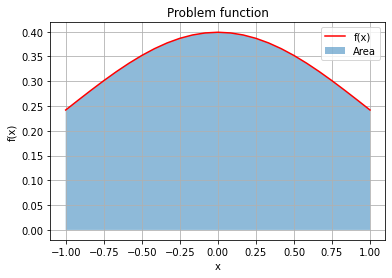

<ipython-input-1-5830d582fbd4>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([points_1, points_2, points_3, points_4, points_1])


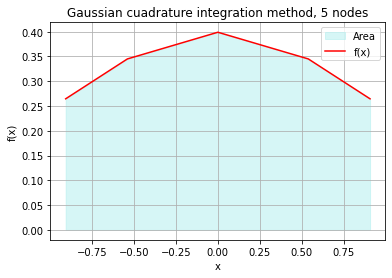

The area under the curve using the Gaussiana quadrature is:  0.68269
The area under the curve using the Milne method is: 0.68238
The difference of the area between both methods is: 0.00031


0.00031

In [ ]:
def problem_function_1(x):
  f = (1/np.sqrt(2*np.pi))*(np.e)**((-x**2)/2)
  return f

dominia1 = np.linspace(-1, 1, 25)

# By the way the functions were defined, calling only the function difference
# it is possible to see the interesting things of each method
difference(dominia1, problem_function_1, 5)

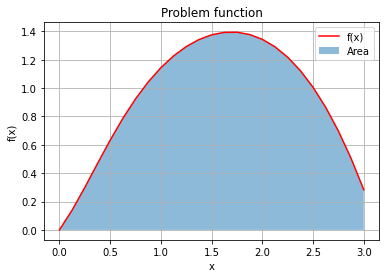

<ipython-input-1-5830d582fbd4>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([points_1, points_2, points_3, points_4, points_1])


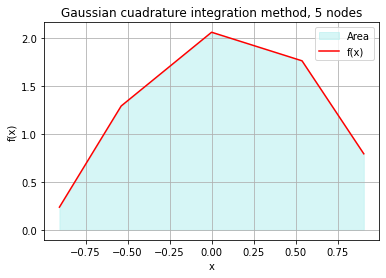

The area under the curve using the Gaussiana quadrature is:  2.88222
The area under the curve using the Milne method is: 2.90031
The difference of the area between both methods is: -0.01809


-0.01809

In [ ]:
def problem_function_2(x):
  f = ((np.e**x)*np.sin(x))/(1+x**2)
  return f

dominia2 = np.linspace(0, 3, 25)

difference(dominia2, problem_function_2, 5)

Resolviendo las integrales se llega a que:

\

1.   $$\int_{-1}^{1}{\frac{1}{\sqrt{2\pi}}}\cdot e^{-\frac{x^2}{2}} \ dx\approx0.68268$$

\

2.   $$\int_{0}^{3}{\frac{e^{x}\cdot sin(x)}{1 + x^2}} \ dx \approx 2.88163 $$

\

Contrastando con los resultados, se aprecia que en ambos casos el método de cuadratura de Gauss es mucho más preciso, sobre todo en el segundo caso, donde la regla de Milne difiere un *0.648%* mientras con Gauss se tiene un error del *0.02%* respecto del valor real.

Ambos son métodos que dan un resultado bastante próximo, por lo que en función de las características del problema físico así como de la magnitud de las unidades que se manejen, se podrían usar ambos, siendo preferible el método de cuadratura de Gauss.

**Ejercicio 3**

*Presentar algún otro caso que les sea de interés y comentar los resultados obtenidos*

Algunos casos de interés, más allá de los que presentan las prácticas que hemos hecho, son integrales sin solución analítica o aquellas que no sean resolubles por métodos directos. Estudiaremos dos funciones:

1. $$\int_{1.1}^{5}{ln(ln(x))}dx$$

2. $$\int_{-1}^1x^8cos(x) dx$$

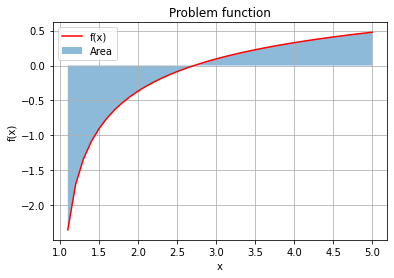

<ipython-input-1-5830d582fbd4>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points = np.array([points_1, points_2, points_3, points_4, points_1])


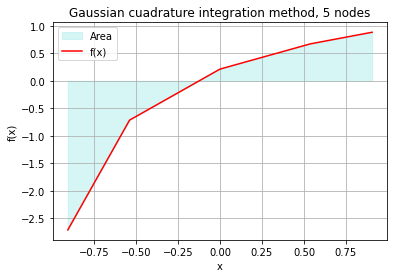

The area under the curve using the Gaussiana quadrature is:  -0.33285
The area under the curve using the Milne method is: -0.48932
The difference of the area between both methods is: 0.15647


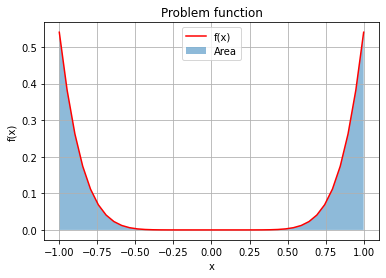

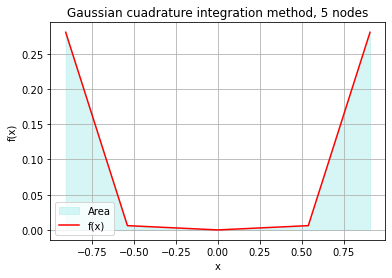

The area under the curve using the Gaussiana quadrature is:  0.13869
The area under the curve using the Milne method is: 0.17297
The difference of the area between both methods is: -0.03428


-0.03428

In [ ]:
def example1(data):
  f = np.log(np.log(data))
  return f

def example2(data):
  f = (data**8)*np.cos(data)
  return f

data_1 = np.linspace(1.1, 5, 40)
data_2 = np.linspace(-1, 1, 40)

difference(data_1, example1, 5)
difference(data_2, example2, 5)

En el caso de la función *example1* se ha visto que el método de Milne es aplicable en función de los límites de integración, ya que si la función empieza a tomar valores en *1*, por ejemplo, por definición de la regla de Milne, el primer término quedará:

$$f(x_0) = f(1) = ln(ln(1)) = ln (0) → -\infty $$

Dando resultado a un área infinita (en valor absoluto). Queda entonces claro que hay que tener en cuenta que ninguna de las evaluaciones de los términos de Milne coincida con una discontinuidad en la función, teniendo en cuenta que si la discontinuidad es de salto infinito, el intervalo en torno a dicha discontinuidad causará un error más grande.

Por otro lado, si comparamos con el valor que se obtiene al resolver la función

$$\int_{1.1}^{5}{ln(ln(x))}dx \approx -0.3453$$

Vemos que el método es aproximado, pero es mucho mejor el método de cuadratura Gaussiana.

Para la función *example1*, se tiene que el resultado debe ser:

$$\int_{-11}^1x^8cos(x) dx \approx 0.1375$$

Nuevamente, el valor más acertado es el proporcionado por el método de cuadratura de Gauss.

En este apartado se ha corroborado algo esperable: cuanto más pequeño sea la longitud del intervalo de integración, más precisa será el resultado por ambos métodos.

Si se tuviese un intervalo de integración muy grande el problema de la precisión es conceptualmente muy sencillo de resolver, se descompone la integral en varias integrales pero en intervalos más pequeños y sumar los resultados de aplicar el método que queramos en cada una de ellas. Esto también serviría para el caso en el que, aunque el intervalo no sea grande, se desee una mayor precisión en el resultado.

Esta idea es, a primera vista, sencilla de acoplar con el programa que se ha hecho hasta ahora, pero no se dispone del tiempo necesario para ello.


**Ejercicio 4**

*Comparar los resultados obtenidos con alguna de las implementaciones presentadas y con procedimientos ya presentes en librerías como Scipy.*

Se recurrirán a los comandos *quad* de la librería de *scipy.integrate*, que es equivalente a emplear el método de cuadratura Gaussiana como se indica en la página, y *integrate* de la librería de *numpy*, que realiza una integración por método trapezoidal compuesto.

En concreto, se usarán las funciones del *ejercicio 2* para comparar las aplicaciones de ambas librerías.

In [ ]:
from scipy.integrate import quad
from sympy import *

scipy_integer1 = quad(problem_function_1, -1, 1)
scipy_integer2 = quad(problem_function_2, 0, 3)

print("Para las funciones del ejercicio 2, los resultados usando el módulo de \
 scipy son: \n")
print(f"La integral de la primera función es {round(scipy_integer1[0], 5)} +/- \
 {round(scipy_integer1[1], 5)}, mientras que de la segunda función es \
 {round(scipy_integer2[0], 5)} +/- {round(scipy_integer2[1], 5)} \n \
 Nota: Los errores de esta implementación son del orden de 10^(-15).")

print("")

numpy_integer1 = np.trapz(problem_function_1(dominia1), dominia1)
numpy_integer2 = np.trapz(problem_function_2(dominia2), dominia2)

print("Usando el módulo de numpy son: \n")
print(f"La integral de la primera función es {round(numpy_integer1, 5)},\
 mientras que de la segunda función es {round(numpy_integer2, 5)}")

Para las funciones del ejercicio 2, los resultados usando el módulo de  scipy son: 

La integral de la primera función es 0.68269 +/-  0.0, mientras que de la segunda función es  2.88164 +/- 0.0 
  Nota: Los errores de esta implementación son del orden de 10^(-15).

Usando el módulo de numpy, en concreto con la forma trapezoidal  compuesta, son: 

La integral de la primera función es 0.68241, mientras que de la segunda función es 2.87789


Se comprueba que para ambos módulos se obtiene un valor lo suficientemente próximo al valor real como para afirmar que son correctos, destacando el de la librería de *scipy* que tiene el error en la quinta cifra significativa en ambos casos, mientras que el usando la librería *numpy* se tiene en la segunda y tercera respectivamente.